In [2]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import scipy

# Test 4: Three Level Qubit, 2 Resonator Modes

##### Relevant Unit Conversions
$10^9hz=1ghz, 1s=10^9 ns, 1s=10^6\mu s$

In [3]:
from scipy.constants import hbar
π = np.pi
µs_to_ns = 1e3
norm_fact = 1/(np.sqrt(2))

### States
$|g\rangle=(1,0,0)^T$, $|e\rangle=(0,1,0)^T$, $|f\rangle=(0,0,1)^T$, $|r_0\rangle=(1,0)^T$, $|r_1\rangle=(0,1)^T$

In [4]:
num_qubit_states =3
num_res_states = 2

g_state = qt.basis(num_qubit_states, 0)
e_state = qt.basis(num_qubit_states, 1)
f_state = qt.basis(num_qubit_states, 2)

r0_state = qt.basis(num_res_states, 0)
r1_state = qt.basis(num_res_states, 1)

### Creation/Annihilation Operators (q1, q2, resonator)
$b_1,b_1^\dagger, b_2, b_2^\dagger, c, c^\dagger.$ 

In [5]:
b1 = qt.tensor(qt.destroy(num_qubit_states), qt.qeye(num_qubit_states), qt.qeye(num_res_states))
b1dag = b1.dag() 
b2 = qt.tensor(qt.qeye(num_qubit_states), qt.destroy(num_qubit_states), qt.qeye(num_res_states))
b2dag = b2.dag() 
c = qt.tensor(qt.qeye(num_qubit_states), qt.qeye(num_qubit_states), qt.destroy(num_res_states))
cdag = c.dag()

### Projection Operators

In [29]:
gg0_proj = qt.tensor(g_state, g_state, r0_state).proj()
ge0_proj = qt.tensor(g_state, e_state, r0_state).proj()
gf0_proj = qt.tensor(g_state, f_state, r0_state).proj()

eg0_proj = qt.tensor(e_state, g_state, r0_state).proj()
ee0_proj = qt.tensor(e_state, e_state, r0_state).proj()
ef0_proj = qt.tensor(e_state, f_state, r0_state).proj()

fg0_proj = qt.tensor(f_state, g_state, r0_state).proj()
fe0_proj = qt.tensor(f_state, e_state, r0_state).proj()
ff0_proj = qt.tensor(f_state, f_state, r0_state).proj()

gg1_proj = qt.tensor(g_state, g_state, r1_state).proj()
ge1_proj = qt.tensor(g_state, e_state, r1_state).proj()
gf1_proj = qt.tensor(g_state, f_state, r1_state).proj()

eg1_proj = qt.tensor(e_state, g_state, r1_state).proj()
ee1_proj = qt.tensor(e_state, e_state, r1_state).proj()
ef1_proj = qt.tensor(e_state, f_state, r1_state).proj()

fg1_proj = qt.tensor(f_state, g_state, r1_state).proj()
fe1_proj = qt.tensor(f_state, e_state, r1_state).proj()
ff1_proj = qt.tensor(f_state, f_state, r1_state).proj()

### Test States
$|g,g,r_0\rangle=(1,0,0,0, ..., 0)^T$, $|g,g,r_1\rangle=(0,0,1,0, ..., 0)^T$, $|g,e,0\rangle=(0,0,0,1, ..., 0)^T$

In [30]:
psi0 = qt.tensor(g_state, g_state, r0_state)
psi1 = qt.tensor(e_state, g_state, r0_state)
psi2 = qt.tensor(f_state, g_state, r0_state)

psi3 = qt.tensor(g_state, g_state, r1_state)
psi4 = qt.tensor(g_state, e_state, r1_state)
psi5 = qt.tensor(g_state, f_state, r1_state)

#### ge
$b_1^\dagger |g,g,0\rangle= |e,g,0\rangle.$

In [31]:
b1dag * psi0 == psi1, b2dag * psi3 == psi4, cdag * psi0 == psi3

(True, True, True)

#### ef: Keep in Mind Normalisation Factor (f_states)!!!
$\frac{1}{\sqrt2} b_1^\dagger |e,g,0\rangle= |f,g,0\rangle.$

In [32]:
b1dag * psi1 * norm_fact == psi2, b2dag * psi4 * norm_fact == psi5

(True, True)

### Hamiltonian
$H/\hbar = \sum_{i=1}^2{\left(\omega_i b_i^\dagger b_i + \frac{\alpha_i}{2} b_i^\dagger b_i^\dagger b_i b_i\right)} + (\omega_r+\chi_1 b_1^\dagger b_1+\chi_2 b_2^\dagger b_2)c^\dagger c + J(b_1^\dagger b_2+b_2^\dagger b_1+b_1^\dagger b_2^\dagger+b_1 b_2)$


In [33]:
def hamiltonian(omega_1, omega_2, omega_r, alpha_1, alpha_2, chi1, chi2, J_coupling):
    t1 = (omega_1 * b1dag * b1) + (omega_2 * b2dag * b2)
    t2 = (alpha_1 / 2 * b1dag * b1dag * b1 * b1) + (alpha_2 / 2 * b2dag * b2dag * b2 * b2)
    t3 = (omega_r + (chi1 * b1dag * b1) + (chi2 * b2dag * b2)) * cdag * c
    t4 = J_coupling * (b1dag * b2 + b2dag * b1)
    t5 = J_coupling * (b1dag * b2dag + b1 * b2)
    return t1 + t2 + t3 + t4 + t5

In [34]:
def plotresult(time_evolution_b):
    ge0_pops = qt.expect(ge0_proj, time_evolution_b.states)
    eg0_pops = qt.expect(eg0_proj, time_evolution_b.states)

    gf0_pops = qt.expect(gf0_proj, time_evolution_b.states)
    fg0_pops = qt.expect(fg0_proj, time_evolution_b.states)
    
    ef0_pops = qt.expect(ef0_proj, time_evolution_b.states)
    fe0_pops = qt.expect(fe0_proj, time_evolution_b.states)

    gg0_pops = qt.expect(gg0_proj, time_evolution_b.states)
    ee0_pops = qt.expect(ee0_proj, time_evolution_b.states)
    #ff0_pops = qt.expect(ff0_proj, time_evolution_b.states)
    
    ge1_pops = qt.expect(ge1_proj, time_evolution_b.states)
    eg1_pops = qt.expect(eg1_proj, time_evolution_b.states)

    gf1_pops = qt.expect(gf1_proj, time_evolution_b.states)
    fg1_pops = qt.expect(fg1_proj, time_evolution_b.states)
    
    ef1_pops = qt.expect(ef1_proj, time_evolution_b.states)
    fe1_pops = qt.expect(fe1_proj, time_evolution_b.states)

    gg1_pops = qt.expect(gg1_proj, time_evolution_b.states)
    ee1_pops = qt.expect(ee1_proj, time_evolution_b.states)
    #ff1_pops = qt.expect(ff1_proj, time_evolution_b.states)
    
    fig, ax = plt.subplots(tight_layout=True)
    ax.plot(t_vec * µs_to_ns, ge0_pops, label="ge0")
    ax.plot(t_vec * µs_to_ns, eg0_pops, label="eg0")
    ax.plot(t_vec * µs_to_ns, gf0_pops, label="gf0")
    ax.plot(t_vec * µs_to_ns, fg0_pops, label="fg0")
    #ax.plot(t_vec * µs_to_ns, gg0_pops, label="gg0")
    ax.plot(t_vec * µs_to_ns, ee0_pops, label="ee0")
    #ax.plot(t_vec * µs_to_ns, ff0_pops, label="ff0")
    
    ax.plot(t_vec * µs_to_ns, ge1_pops, label="ge1")
    ax.plot(t_vec * µs_to_ns, eg1_pops, label="eg1")
    ax.plot(t_vec * µs_to_ns, gf1_pops, label="gf1")
    ax.plot(t_vec * µs_to_ns, fg1_pops, label="fg1")
    #ax.plot(t_vec * µs_to_ns, gg1_pops, label="gg1")
    ax.plot(t_vec * µs_to_ns, ee1_pops, label="ee1")
    #ax.plot(t_vec * µs_to_ns, ff1_pops, label="ff1")

    ax.legend()
    ax.set_xlabel('Time, $t$ [ns]')
    ax.set_ylabel(r'Amplitude Squared, $P_{mn}$')
    ax.set_title('SWAP gate')

    plt.show()
    plt.close()

## On Resonance, Same Anharmonicity, Same Chi

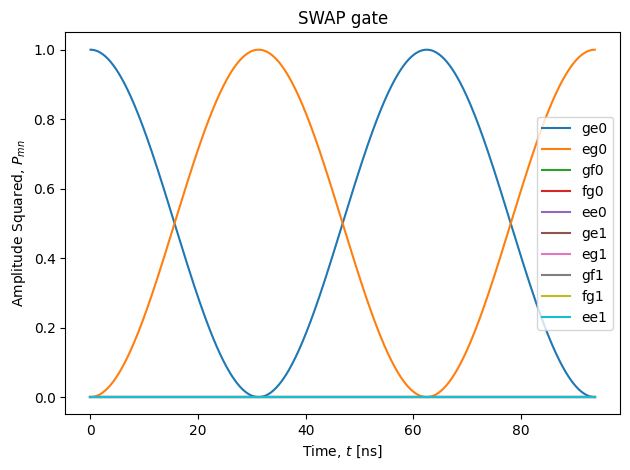

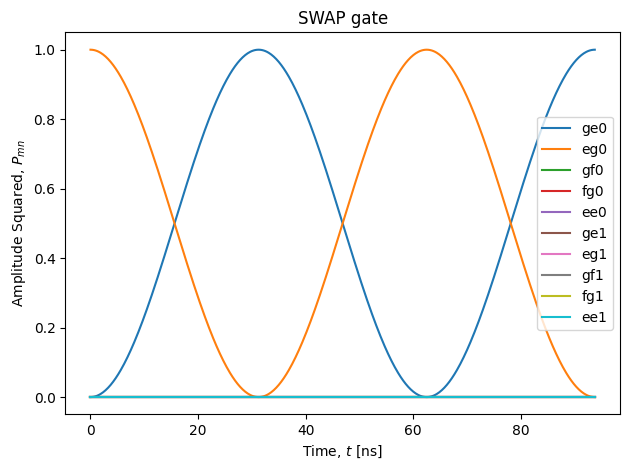

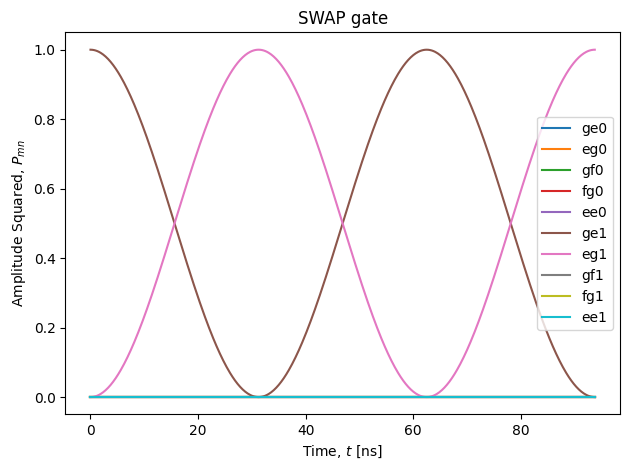

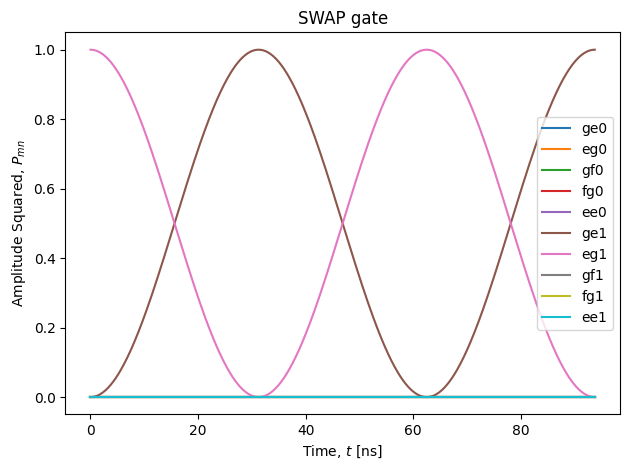

In [35]:
omega = 2*π * 6000
omegares = 2*π * 7000
J_coupling = 2*π * 8
alpha = 2*π * -300
chi = 2*π * 4 #(4mhz)

h_ww_aa_cc = hamiltonian(omega_1=omega, omega_2=omega, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)

t_start = 0
t_end = 3 * π / (2 * J_coupling)
t_vec = np.linspace(t_start, t_end, 601)

psi1 = qt.tensor(g_state, e_state, r0_state)
psi2 = qt.tensor(e_state, g_state, r0_state)
psi3 = qt.tensor(g_state, e_state, r1_state)
psi4 = qt.tensor(e_state, g_state, r1_state)

te1 = qt.mesolve(h_ww_aa_cc, psi1, t_vec, [], [])
te2 = qt.mesolve(h_ww_aa_cc, psi2, t_vec, [], [])
te3 = qt.mesolve(h_ww_aa_cc, psi3, t_vec, [], [])
te4 = qt.mesolve(h_ww_aa_cc, psi4, t_vec, [], [])

_ = plotresult(te1), plotresult(te2), plotresult(te3), plotresult(te4)

## Slight Detuning

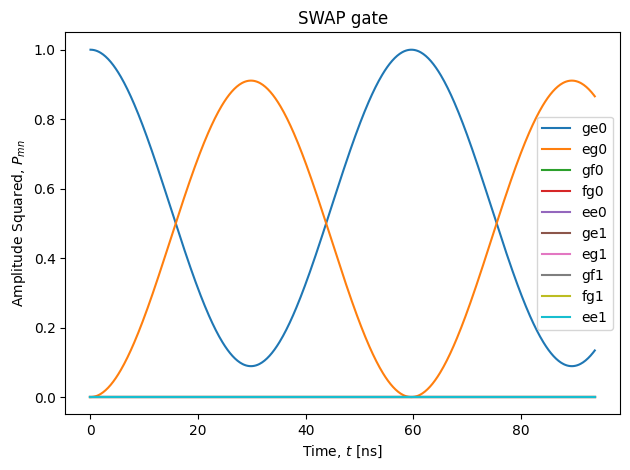

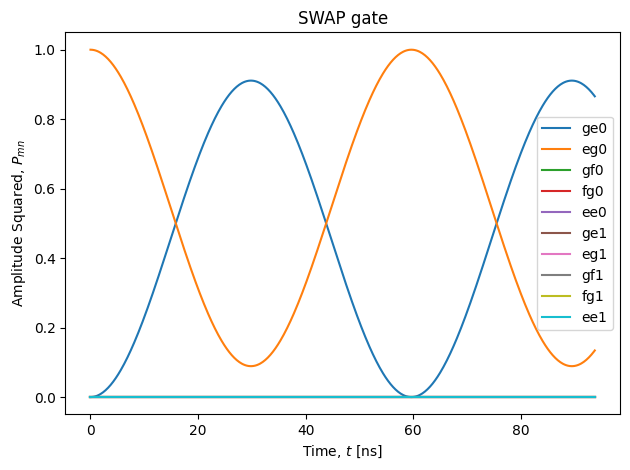

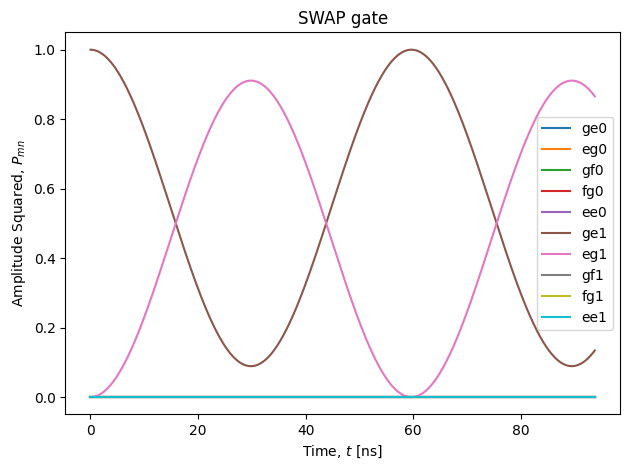

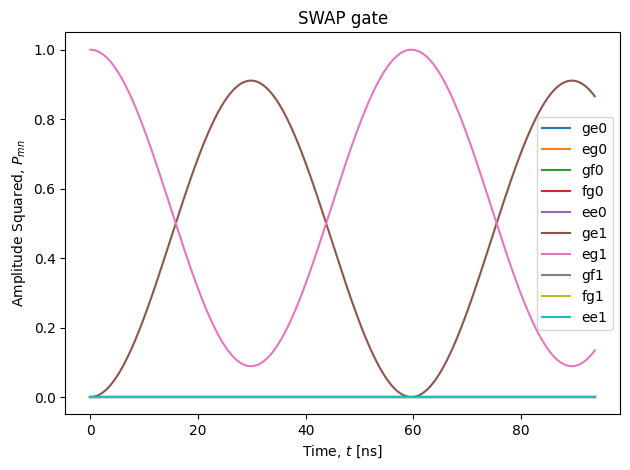

In [36]:
omega1 = 2*π * 6000
detuning = 5 # Mhz/2π
omega2 = omega1 - (2*π* detuning)
omegares = 2*π * 7000
J_coupling = 2*π * 8
alpha = 2*π * -300
chi = 2*π * 4 #(4mhz)

h_ww_aa_cc = hamiltonian(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)

t_start = 0
t_end = 3 * π / (2 * J_coupling)
t_vec = np.linspace(t_start, t_end, 601)

psi1 = qt.tensor(g_state, e_state, r0_state)
psi2 = qt.tensor(e_state, g_state, r0_state)
psi3 = qt.tensor(g_state, e_state, r1_state)
psi4 = qt.tensor(e_state, g_state, r1_state)

te1 = qt.mesolve(h_ww_aa_cc, psi1, t_vec, [], [])
te2 = qt.mesolve(h_ww_aa_cc, psi2, t_vec, [], [])
te3 = qt.mesolve(h_ww_aa_cc, psi3, t_vec, [], [])
te4 = qt.mesolve(h_ww_aa_cc, psi4, t_vec, [], [])

_ = plotresult(te1), plotresult(te2), plotresult(te3), plotresult(te4)

## Largely Detuned

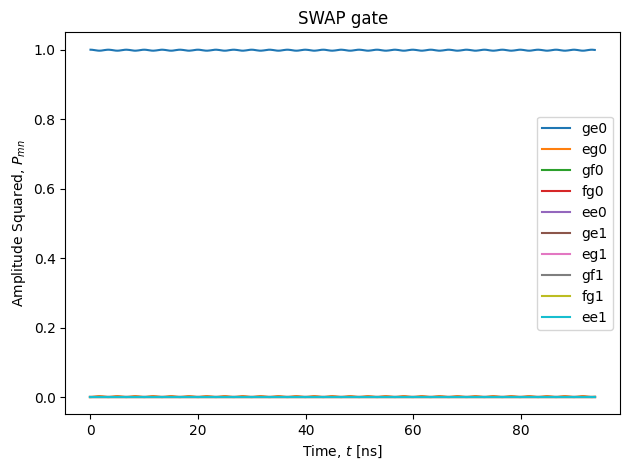

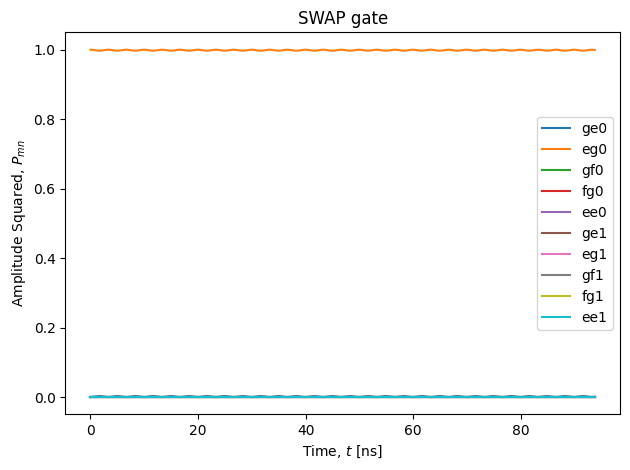

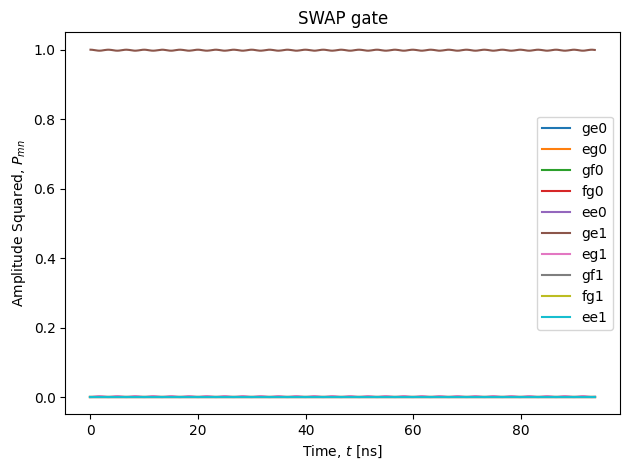

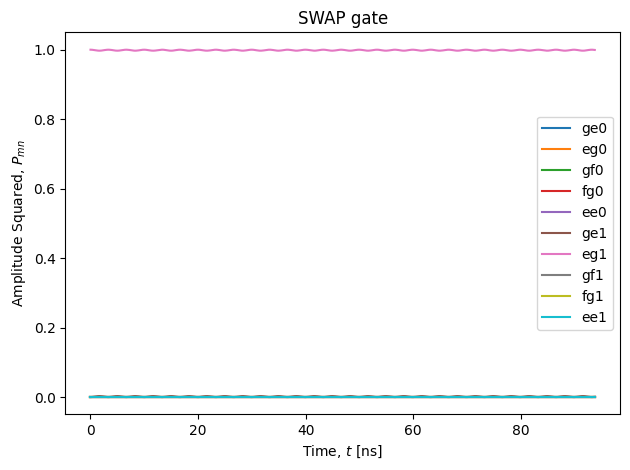

In [37]:
omega1 = 2*π * 6000
detuning = 300 # Mhz/2π
omega2 = omega1 - (2*π* detuning)
omegares = 2*π * 7000
J_coupling = 2*π * 8
alpha = 2*π * -300
chi = 2*π * 4 #(4mhz)

h_ww_aa_cc = hamiltonian(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)

t_start = 0
t_end = 3 * π / (2 * J_coupling)
t_vec = np.linspace(t_start, t_end, 601)

psi1 = qt.tensor(g_state, e_state, r0_state)
psi2 = qt.tensor(e_state, g_state, r0_state)
psi3 = qt.tensor(g_state, e_state, r1_state)
psi4 = qt.tensor(e_state, g_state, r1_state)

te1 = qt.mesolve(h_ww_aa_cc, psi1, t_vec, [], [])
te2 = qt.mesolve(h_ww_aa_cc, psi2, t_vec, [], [])
te3 = qt.mesolve(h_ww_aa_cc, psi3, t_vec, [], [])
te4 = qt.mesolve(h_ww_aa_cc, psi4, t_vec, [], [])

_ = plotresult(te1), plotresult(te2), plotresult(te3), plotresult(te4)

## Resonance Between $|2,0\rangle, |1,1\rangle$
$\psi_0=|f,g,0\rangle$ 
<br> 
$\omega_{1ef}=\omega_{2ge}$ or in other words $\omega_{1ge}+\alpha_1 = \omega_{2ge}$

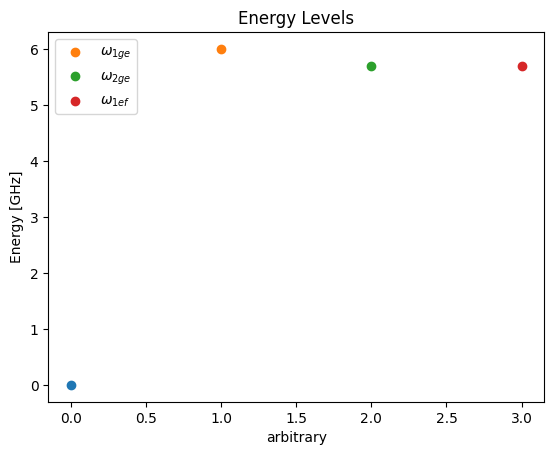

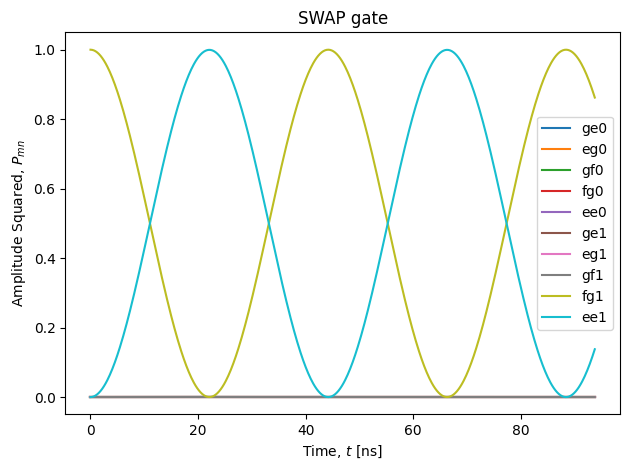

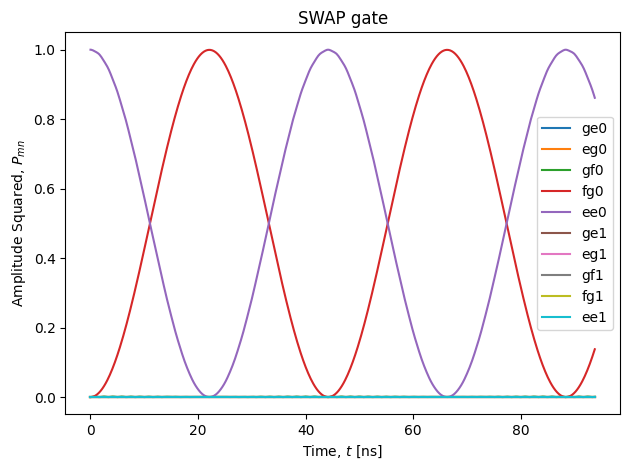

In [38]:
omega1 = 2*π * 6000
alpha1 = 2*π * -300
alpha2 = 2*π * -300
omega2 = omega1 + alpha1
omegares = 2*π * 7500
J_coupling = 2*π * 8
chi = 2*π * 4 #(4mhz)

fig = plt.figure()
plt.scatter(0,0)
plt.scatter(1, omega1/(1000*2*π), label='$\omega_{1ge}$')
plt.scatter(2, omega2/(1000*2*π), label='$\omega_{2ge}$')
plt.scatter(3, (omega1+alpha1)/(1000*2*π), label='$\omega_{1ef}$')
plt.legend()
plt.ylabel('Energy [GHz]')
plt.xlabel('arbitrary')
plt.title('Energy Levels')

h = hamiltonian(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha1, 
                alpha_2=alpha2, chi1=chi, chi2=chi, J_coupling=J_coupling)

t_start = 0
t_end = 3 * π / (2 * J_coupling)
t_vec = np.linspace(t_start, t_end, 601)

psi1 = qt.tensor(f_state, g_state, r1_state)
psi2 = qt.tensor(e_state, e_state, r0_state)
te1 = qt.mesolve(h, psi1, t_vec, [], [])
te2 = qt.mesolve(h, psi2, t_vec, [], [])
_ = plotresult(te1)
_ = plotresult(te2)

#cross terms, no cross terms = output 2nd excited state population state numbers to compare if theres difference, (start with perfect on resonance, start in ee)